In [1]:
"""
The MIT License (MIT)
Copyright (c) 2021 NVIDIA
Permission is hereby granted, free of charge, to any person obtaining a copy of
this software and associated documentation files (the "Software"), to deal in
the Software without restriction, including without limitation the rights to
use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of
the Software, and to permit persons to whom the Software is furnished to do so,
subject to the following conditions:
The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS
FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR
COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER
IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN
CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
"""


'\nThe MIT License (MIT)\nCopyright (c) 2021 NVIDIA\nPermission is hereby granted, free of charge, to any person obtaining a copy of\nthis software and associated documentation files (the "Software"), to deal in\nthe Software without restriction, including without limitation the rights to\nuse, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of\nthe Software, and to permit persons to whom the Software is furnished to do so,\nsubject to the following conditions:\nThe above copyright notice and this permission notice shall be included in all\ncopies or substantial portions of the Software.\nTHE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR\nIMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS\nFOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR\nCOPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER\nIN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OU

This code example is close to identical to c1e1_perceptron_learning but adds plotting of the learning process. More context for this code example can be found in the section "The Perceptron Learning Algorithm" in Chapter 1 in the book Learning Deep Learning by Magnus Ekman (ISBN: 9780137470358).

In this code snippet, the function show_learning() has been extended to plot a graphical representation of the perceptron weights.

In [2]:
#pip install matplotlib
import matplotlib.pyplot as plt
import random

# Define variables needed for plotting.
color_list = ['r-', 'm-', 'y-', 'c-', 'b-', 'g-']
color_index = 0

def show_learning(w):
    global color_index
    print('w0 =', '%5.2f' % w[0], ', w1 =', '%5.2f' % w[1],
          ', w2 =', '%5.2f' % w[2])
    if color_index == 0:
        plt.plot([1.0], [1.0], 'b_', markersize=12)
        plt.plot([-1.0, 1.0, -1.0], [1.0, -1.0, -1.0],
                 'r+', markersize=12)
        plt.axis([-2, 2, -2, 2])
        plt.xlabel('x1')
        plt.ylabel('x2')
    x = [-2.0, 2.0]
    if abs(w[2]) < 1e-5:
        y = [-w[1]/(1e-5)*(-2.0)+(-w[0]/(1e-5)),
             -w[1]/(1e-5)*(2.0)+(-w[0]/(1e-5))]
    else:
        y = [-w[1]/w[2]*(-2.0)+(-w[0]/w[2]),
             -w[1]/w[2]*(2.0)+(-w[0]/w[2])]
    plt.plot(x, y, color_list[color_index])
    if color_index < (len(color_list) - 1):
        color_index += 1


The remainder of the code below is unchanged compared to c1e1_perceptron_learning.


w0 =  0.20 , w1 = -0.60 , w2 =  0.25
w0 =  0.30 , w1 = -0.50 , w2 =  0.15
w0 =  0.40 , w1 = -0.40 , w2 =  0.05
w0 =  0.30 , w1 = -0.50 , w2 = -0.05
w0 =  0.40 , w1 = -0.40 , w2 = -0.15


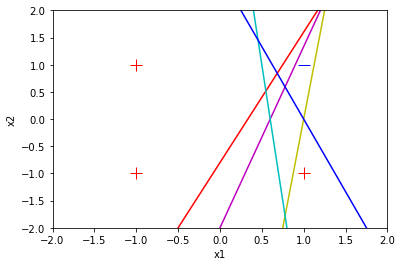

In [3]:
# Define variables needed to control training process.
random.seed(7) # To make repeatable
LEARNING_RATE = 0.1
index_list = [0, 1, 2, 3] # Used to randomize order

# Define training examples.
x_train = [(1.0, -1.0, -1.0), (1.0, -1.0, 1.0),
    (1.0, 1.0, -1.0), (1.0, 1.0, 1.0)] # Inputs
y_train = [1.0, 1.0, 1.0, -1.0] # Output (ground truth)

# Define perceptron weights.
w = [0.2, -0.6, 0.25] # Initialize to some "random" numbers

# Print initial weights.
show_learning(w)

# First element in vector x must be 1.
# Length of w and x must be n+1 for neuron with n inputs.
def compute_output(w, x):
    z = 0.0
    for i in range(len(w)):
        z += x[i] * w[i] # Compute sum of weighted inputs
    if z < 0: # Apply sign function
        return -1
    else:
        return 1

# Perceptron training loop.
all_correct = False
while not all_correct:
    all_correct = True
    random.shuffle(index_list) # Randomize order
    for i in index_list:
        x = x_train[i]
        y = y_train[i]
        p_out = compute_output(w, x) # Perceptron function
        if y != p_out: # Update weights when wrong
            for j in range(0, len(w)):
                w[j] += (y * LEARNING_RATE * x[j])
            all_correct = False
            show_learning(w) # Show updated weights
